<a href="https://colab.research.google.com/github/Alberto-Pedraza/Tarea5rna/blob/main/Tarea5AlbertoPedraza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
Diseñar una capa en Keras que transforme imágenes a color en escala de grises. Se puede utilizar cualquier base de datos para hacer las pruebas. (Sólo se pide la capa, no hay entrenamiento que realizar)

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Togreyscale(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super(Togreyscale,self).__init__(**kwargs)

  def build(self,input_shape):
    super(Togreyscale,self).build(input_shape)

  def call(self,inputs):
    gscaleimg = tf.reduce_sum(inputs*tf.constant([0.299, 0.587, 0.114], dtype=tf.float32), axis=-1, keepdims=True)
    return gscaleimg

  def compute_output_shape(self, input_shape):
        return input_shape[:-1] + (1,)

In [2]:
!wget https://dagshub.com/jorgevc/Gatos-y-Perros/raw/24eaabd8ca81ed89f780138c1e3955ccd1f3d155/data/DogsCats.zip

--2023-10-20 21:05:30--  https://dagshub.com/jorgevc/Gatos-y-Perros/raw/24eaabd8ca81ed89f780138c1e3955ccd1f3d155/data/DogsCats.zip
Resolving dagshub.com (dagshub.com)... 35.186.200.224
Connecting to dagshub.com (dagshub.com)|35.186.200.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘DogsCats.zip’

DogsCats.zip            [    <=>             ] 545.56M  62.8MB/s    in 7.9s    

2023-10-20 21:05:39 (69.3 MB/s) - ‘DogsCats.zip’ saved [572061537]



In [3]:
!unzip DogsCats.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/cat/cat.1.jpg     
  inflating: train/cat/cat.1000.jpg  
  inflating: train/cat/cat.1023.jpg  
  inflating: train/cat/cat.1038.jpg  
  inflating: train/cat/cat.1040.jpg  
  inflating: train/cat/cat.1056.jpg  
  inflating: train/cat/cat.1059.jpg  
  inflating: train/cat/cat.1070.jpg  
  inflating: train/cat/cat.1078.jpg  
  inflating: train/cat/cat.1080.jpg  
  inflating: train/cat/cat.1109.jpg  
  inflating: train/cat/cat.1118.jpg  
  inflating: train/cat/cat.1133.jpg  
  inflating: train/cat/cat.1139.jpg  
  inflating: train/cat/cat.1158.jpg  
  inflating: train/cat/cat.1163.jpg  
  inflating: train/cat/cat.1165.jpg  
  inflating: train/cat/cat.1171.jpg  
  inflating: train/cat/cat.1175.jpg  
  inflating: train/cat/cat.1195.jpg  
  inflating: train/cat/cat.1209.jpg  
  inflating: train/cat/cat.1217.jpg  
  inflating: train/cat/cat.1232.jpg  
  inflating: train/cat/cat.1233.jpg  
  inflating: train/ca

In [53]:
%cd ..

/content


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [55]:
ih, iw = 150, 150 #tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

#train_dir = 'data/minitrain' #directorio de entrenamiento
#test_dir = 'data/minitest' #directorio de prueba
train_dir = 'train' #directorio de entrenamiento
test_dir = 'test' #directorio de prueba


num_class = 2 #cuantas clases
epochs = 30 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros

batch_size = 50 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 20000 #numero de imagenes en train
num_test = 5000 #numero de imagenes en test


epoch_steps = num_train // batch_size
test_steps = num_test // batch_size


gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.


train = gentrain.flow_from_directory(train_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')

gentest = ImageDataGenerator(rescale=1. / 255)

test = gentest.flow_from_directory(test_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [56]:
model = Sequential()
model.add(Togreyscale(input_shape=(ih, iw,3)))
model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 togreyscale_6 (Togreyscale  (None, 150, 150, 1)       0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 10)      100       
                                                                 
 activation (Activation)     (None, 148, 148, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 10)        910       
                                                                 
 activation_1 (Activation)   (None, 72, 72, 10)       

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit_generator(
                train,
                steps_per_epoch=epoch_steps,
                epochs=epochs,
                validation_data=test,
                validation_steps=test_steps
                )

<ipython-input-57-efff00155d8a>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/30
400/400 [==============================] - 291s 723ms/step - loss: 0.6193 - accuracy: 0.6491 - val_loss: 0.6127 - val_accuracy: 0.6638
Epoch 2/30
400/400 [==============================] - 300s 748ms/step - loss: 0.5326 - accuracy: 0.7340 - val_loss: 0.5203 - val_accuracy: 0.7370
Epoch 3/30
400/400 [==============================] - 303s 757ms/step - loss: 0.4863 - accuracy: 0.7671 - val_loss: 0.4825 - val_accuracy: 0.7628
Epoch 4/30
400/400 [==============================] - 306s 766ms/step - loss: 0.4529 - accuracy: 0.7899 - val_loss: 0.4609 - val_accuracy: 0.7786
Epoch 5/30
400/400 [==============================] - 298s 746ms/step - loss: 0.4167 - accuracy: 0.8095 - val_loss: 0.5159 - val_accuracy: 0.7558
Epoch 6/30
400/400 [==============================] - 299s 747ms/step - loss: 0.3839 - accuracy: 0.8270 - val_loss: 0.5147 - val_accuracy: 0.7498
Epoch 7/30
400/400 [==============================] - 299s 746ms/step - loss: 0.3432 - accuracy: 0.8470 - val_loss: 0.4468 -

KeyboardInterrupt: ignored

In [5]:
#%cd train/dog

/content/train


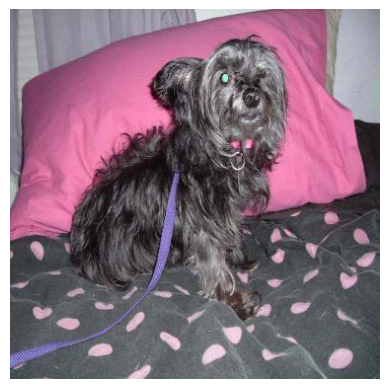

In [35]:
"""
import matplotlib.pyplot as plt

image = tf.io.read_file('dog.0.jpg')
image = tf.io.decode_jpeg(image,channels=3)

image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize pixel values to the range [0, 1]
image = tf.image.resize(image, [375, 375])  # Resize to 150x150
#image = tf.convert_to_tensor(image)

plt.imshow(image)
plt.axis('off')  # Hide axis numbers and ticks
plt.show()
#image
"""

# Ejercicio 2

Entrenar una red para que reproduzca las siguientes funciones en el intervalo [-1,1]. Graficar la solución de la red en conjunto con la gráfica de la función.

a) $3\, sin(\pi x)$

b) $1\,+\, 2x\, +\, 4x^3$

## Inciso a)